# Overview
---

In [107]:
from glob import glob
from scipy.misc import imread
import matplotlib.pyplot as plt
import skimage.filters as filters
import numpy as np
from scipy.ndimage.filters import convolve
from skimage.exposure import rescale_intensity
%matplotlib inline

In [160]:
raw_images  = np.array([imread(fp) for fp in glob('.\\data\\resized-images\\*.png')])
demo_images = raw_images[[11, 14, 18, 21, 44], :, :]
demo_masks  = np.array([imread(fp) for fp in glob('.\\data\\annotated-images-masks\\*.png')])[[11, 14, 18, 21, 44], :, :]

### 1. Sample Images

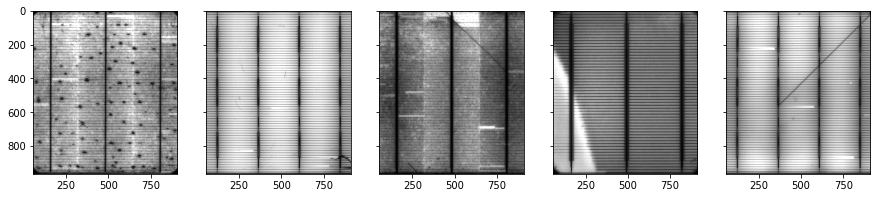

In [91]:
f, axs        = plt.subplots(1, 5, figsize = (15, 3), sharey=True)
for i, ax in enumerate(axs):
    ax.imshow(demo_images[i], cmap = 'gray');
plt.savefig('../Report/images/sample_panels.pdf', dpi = 400)

### 2. Smoothing

In [161]:
def plot_filter_results(filter_function, cmap = 'gray', filename='filter_results'):
    f, axs = plt.subplots(1, 5, figsize = (15, 3), sharey = True)
    for i, ax in enumerate(axs):
        ax.imshow(filter_function(demo_images[i]), cmap = cmap)
        ax.axis('off')
    plt.savefig('../Report/images/'+filename+'.pdf', dpi = 400)
    
def chain(*args):
    def function_chain(image):
        for arg in args:
            image = arg(image)
        return image
    return function_chain

def plot_masks():
    f, axs = plt.subplots(1, 5, figsize = (15, 3), sharey = True)
    for i, ax in enumerate(axs):
        ax.imshow(demo_masks[i], cmap = 'gray')
        ax.axis('off')
    plt.savefig('../Report/images/demo_masks.pdf', dpi = 400)

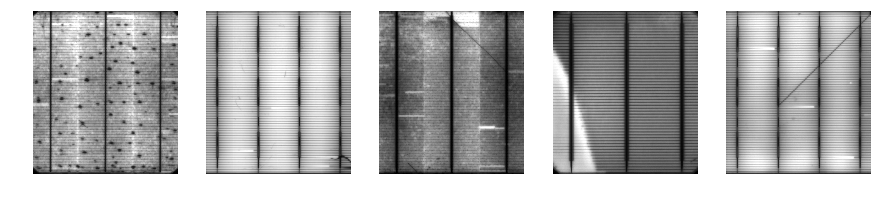

In [176]:
f, axs  = plt.subplots(1, 5, figsize = (15, 3), sharey=True)
for i, ax in enumerate(axs):
    ax.imshow(demo_images[i], cmap = 'gray'); ax.axis('off')
plt.savefig('../Report/images/demo_images.pdf', dpi = 400)

### 2. Sobel Filters

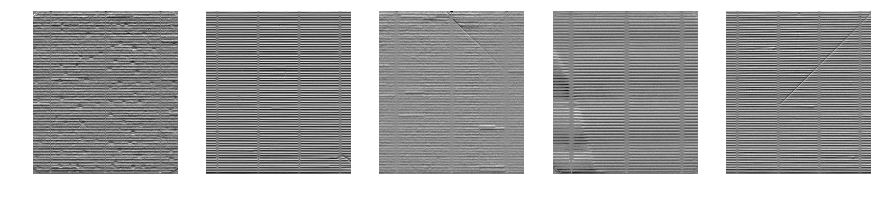

In [169]:
plot_filter_results(filters.sobel_h, filename='sobelh')

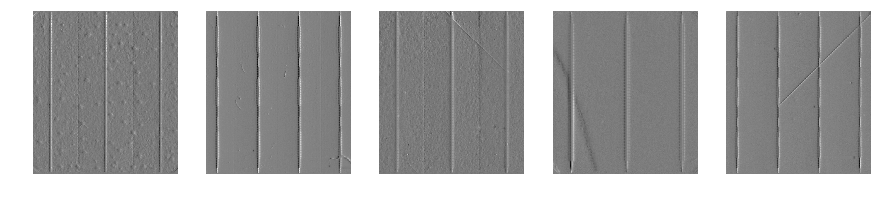

In [170]:
plot_filter_results(chain(filters.sobel_v), filename='sobelv')

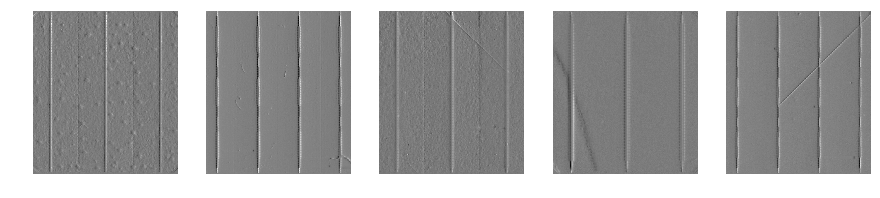

In [171]:
plot_filter_results(filters.prewitt_v, filename='prewittv')

In [274]:
def gabor_ne(image):
    Re, Im = filters.gabor(image, frequency=1/10, theta = np.pi/4, bandwidth=3, offset=np.pi/2)
    return np.sqrt(Re**2 + Im**2)

def gabor_nw(image):
    Re, Im = filters.gabor(image, frequency=1/10, theta = -np.pi/4, bandwidth=3, offset=np.pi/2)
    return np.sqrt(Re**2 + Im**2)

In [236]:
def complex_magnitude(array):
    return np.sqrt(np.real(array)**2 + np.imag(array)**2)

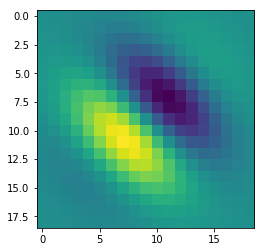

In [265]:
plt.imshow(np.real(filters.gabor_kernel(frequency = 1/13, theta = -np.pi/4, bandwidth = 2, offset=np.pi/2)));

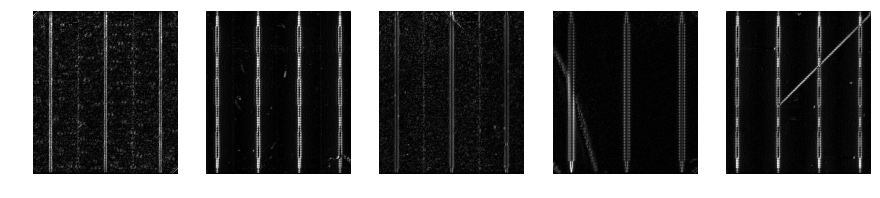

In [259]:
plot_filter_results(chain(filters.sobel_v, gabor_ne), filename = 'sobelv_gaborne')

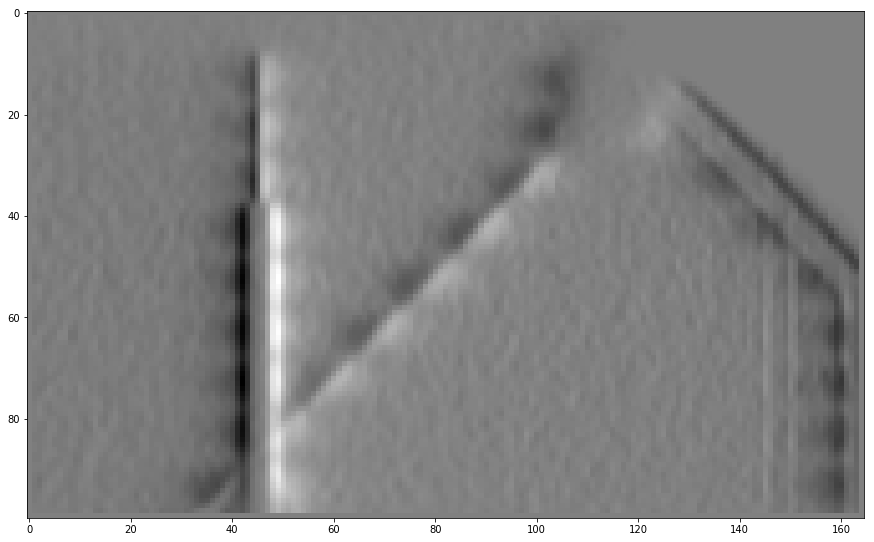

In [234]:
plt.figure(figsize = (15, 15))
plt.imshow(filters.sobel_v(demo_images[4][0:100, 800:]), cmap = 'gray');

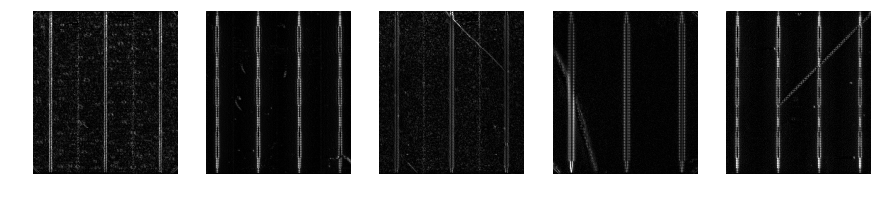

In [270]:
plot_filter_results(chain(filters.sobel_v, gabor_nw), filename = 'sobelv_gabornw')

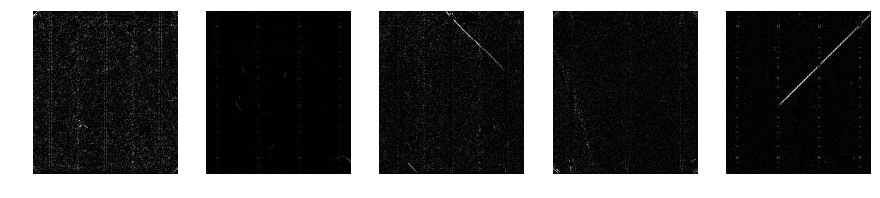

In [275]:
def gabor_diff(image):
    return np.abs(gabor_ne(image) - gabor_nw(image)).astype(np.float64)

plot_filter_results(chain(filters.sobel_v, gabor_diff), filename = 'sobelv_gabordiff')

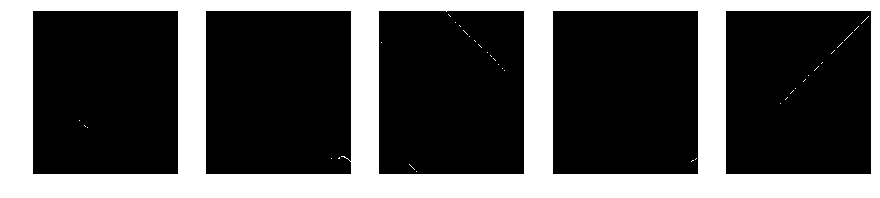

In [162]:
plot_masks()

In [213]:
U, D, V = np.linalg.svd(demo_images[4])